<a href="https://colab.research.google.com/github/Minsung-commit/TIL/blob/master/400_CNN_CIFAR100_Modeling_GPU_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR100 - Categorical Classification
> # Convolutional Neural Network

In [1]:
import warnings
warnings.filterwarnings('ignore')

* import Tensorflow

In [2]:
import tensorflow

tensorflow.__version__

'2.5.0'

# I. CIFAR100 Data_Set Load

In [3]:
from tensorflow.keras.datasets import cifar100

(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode = 'fine')

169009152/169001437 [==============================] - 4s 0us/step


# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape

In [4]:
X_train = X_train.reshape((50000,  32, 32, 3))
X_test = X_test.reshape((10000,  32, 32, 3))

* Normalization

In [5]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

> ## 2) One Hot Encoding

In [6]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# III. MNIST Keras Modeling

> ## 1) Model Define

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32,32, 3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=32, kernel_size=(3,3),padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=32, kernel_size=(3,3),padding='same', activation='relu'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 32)          9248      
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.add(layers.Flatten())
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(units=100, activation='softmax'))


> ## 2) Model Compile

* 모델 학습방법 설정

In [19]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics=['accuracy'])

> ## 3) Model Fit

* 약 5분

In [20]:
%%time

hist_mnist = model.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
313/313 [==============================] - 3s 8ms/step - loss: 4.0042 - accuracy: 0.0926 - val_loss: 3.6175 - val_accuracy: 0.1554
Epoch 2/100
313/313 [==============================] - 2s 7ms/step - loss: 3.4238 - accuracy: 0.1880 - val_loss: 3.3257 - val_accuracy: 0.2063
Epoch 3/100
313/313 [==============================] - 2s 7ms/step - loss: 3.1192 - accuracy: 0.2440 - val_loss: 3.2098 - val_accuracy: 0.2176
Epoch 4/100
313/313 [==============================] - 2s 7ms/step - loss: 2.8955 - accuracy: 0.2853 - val_loss: 3.0666 - val_accuracy: 0.2574
Epoch 5/100
313/313 [==============================] - 2s 7ms/step - loss: 2.7016 - accuracy: 0.3263 - val_loss: 2.9514 - val_accuracy: 0.2791
Epoch 6/100
313/313 [==============================] - 2s 7ms/step - loss: 2.5454 - accuracy: 0.3590 - val_loss: 2.8077 - val_accuracy: 0.3104
Epoch 7/100
313/313 [==============================] - 2s 7ms/step - loss: 2.4056 - accuracy: 0.3881 - val_loss: 2.8232 - val_accuracy: 0.3096

> ## 4) 학습 결과 시각화

* Loss Visualization

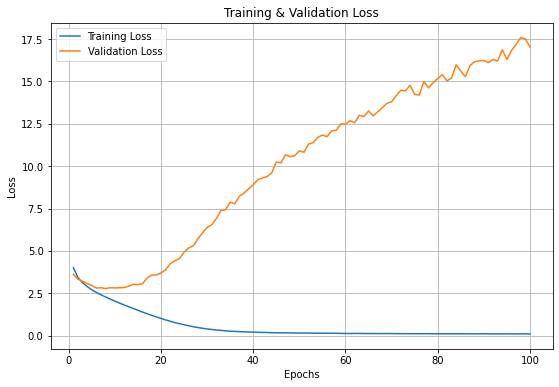

In [21]:
import matplotlib.pyplot as plt

epochs = range(1, len(hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, hist_mnist.history['loss'])
plt.plot(epochs, hist_mnist.history['val_loss'])
# plt.ylim(0, 0.4)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [22]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 16.6042 - accuracy: 0.3014
Loss = 16.60420
Accuracy = 0.30140


# 
# 
# 
# The End
# 
# 
# 